
https://www.worldometers.info/coronavirus/

In [73]:
import matplotlib.pyplot as plt
import pandas as pd
import requests
from bs4 import BeautifulSoup
import lxml.html as lh
import pandas as pd
import copy 
url= 'https://www.worldometers.info/coronavirus'
page = requests.get(url)
doc = lh.fromstring(page.content)
table_data = doc.xpath('//td')

In [74]:
new_list = []
for t in table_data:
    new_list.append(t.text_content())

In [75]:
country_data = []
count = 0
while (count <= len(new_list)-10):
    i = 0
    holder = []
    while (i <= 10):
        holder.append(new_list[count+i])
        i += 1
    country_data.append(holder)
    count += 11

In [76]:
list_header = [['Country_Other','Total_Cases','New_Cases','Total_Deaths','New_Deaths','Total_Recovered',
                'Active_Cases','Serious_Critical','Total_Cases/1M_pop','Total_Deaths 1m/pop','1st Case']]
uncleaned_data = list_header + country_data

In [77]:
def type_cleaner(given_list,i,j):
    if (str(given_list[i][j]).strip() != ''):
        value = str(given_list[i][j]).replace("+", "")
        created = value.replace(",", "")
        new_value = int(created)
        final_value = new_value
        given_list[i][j] = final_value
    else:
        given_list[i][j] = None
    return None
for i in range(1,len(uncleaned_data)):
    type_cleaner(uncleaned_data,i,1)
    type_cleaner(uncleaned_data,i,2)
    type_cleaner(uncleaned_data,i,3)
    type_cleaner(uncleaned_data,i,4)
    type_cleaner(uncleaned_data,i,5)
    type_cleaner(uncleaned_data,i,6)
    type_cleaner(uncleaned_data,i,7)
for i in range(1,len(uncleaned_data)):
    uncleaned_data[i][0] = str(uncleaned_data[i][0]).strip()
for i in range(1,len(uncleaned_data)):
    if uncleaned_data[i][0] == 'USA':
        uncleaned_data[i][0] = 'United States of America'

In [78]:
import chart_studio.plotly as py
import chart_studio.tools as tls

In [79]:
tls.set_credentials_file(username='nkerecha',api_key='usxNdr2K5nTBPiJ9ACCp')

In [80]:
column_names= ['Country_Other','Total_Cases','New_Cases','Total_Deaths','New_Deaths','Total_Recovered',
               'Active_Cases','Serious_Critical','Total_Cases/1M_pop','Total_Deaths 1m/pop','1st Case']
df = pd.DataFrame(uncleaned_data[1:],columns =column_names)

In [81]:
df_country_data = df.filter(['Total_Cases','New_Cases','Total_Deaths','New_Deaths','Total_Recovered',
               'Active_Cases','Serious_Critical','Total_Cases/1M_pop'], axis=1)
df_country_names = pd.DataFrame(df.astype(str)['Country_Other'])
data = pd.concat([df_country_names, df_country_data],axis = 1)

In [82]:
from shapely.geometry import Point, LineString, Polygon, MultiPolygon
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas
import math

In [83]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

In [90]:
data['log_data_cases'] = None
for i in range(0,len(data['Total_Cases'])):
    value = copy.deepcopy(data['Total_Cases'].loc[i])
    returned = int(math.log(value))
    data['log_data_cases'].loc[i] = copy.deepcopy(returned)

In [85]:
merged_inner = pd.merge(left=world, right=data, left_on=world.name, right_on=data.Country_Other)

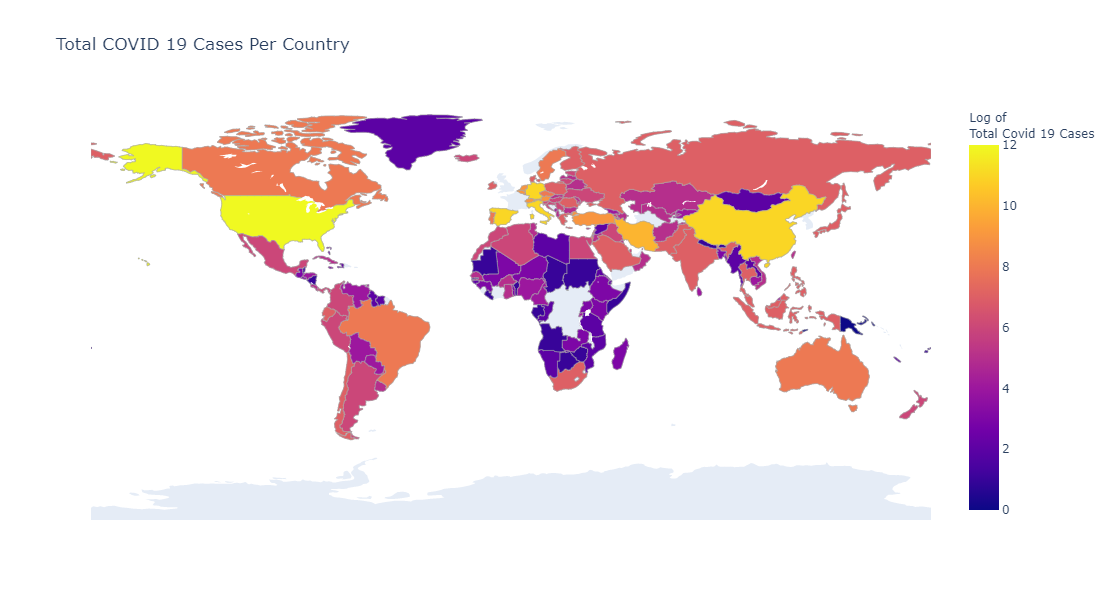

In [89]:
import plotly.graph_objects as go
merged_inner['text'] = 'Country: ' + merged_inner['name'].astype(str) +'<br>' + 'Cases: ' + merged_inner['Total_Cases'].astype(str)
fig = go.Figure(data=go.Choropleth(
    locations = merged_inner['iso_a3'],
    z = merged_inner['log_data_cases'],
    text = merged_inner['text'],
    colorscale = 'Viridis',
    autocolorscale=True,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = 'Log of' + '<br>' + 'Total Covid 19 Cases',
))

fig.update_layout(
    title_text='Total COVID 19 Cases Per Country',
    autosize=False,
    width=1100,
    height=600,
    geo=dict(
        showframe=False,
        showcoastlines=False
    )

)
fig.show()